In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 7s 0us/step


In [ ]:
x_train = X_train.astype(np.float32)/255
x_test = X_test.astype(np.float32)/255
y_train = tf.keras.utils.to_categorical(Y_train)
y_test = tf.keras.utils.to_categorical(Y_test)

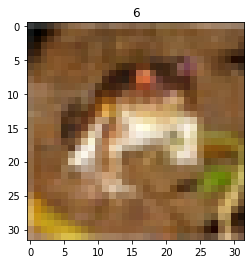

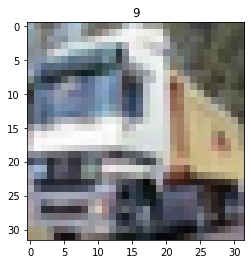

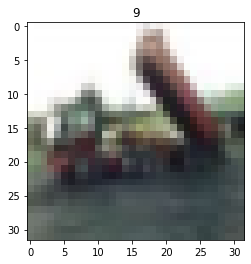

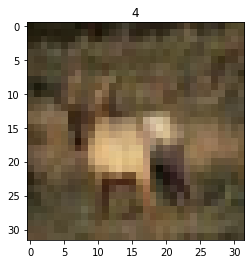

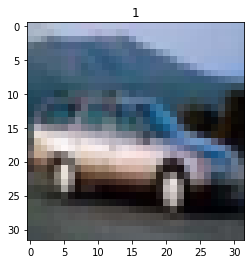

In [ ]:
for i in range(5):
  plt.figure(figsize=(5,4))
  plt.imshow(X_train[i])
  plt.title(Y_train[i][0])

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [ ]:
model = Sequential()
model.add(keras.Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3,3), strides=2, activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3,3), activation="relu"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          9248      
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64, (3,3), activation="relu"))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               73856     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,steps_per_epoch=200,batch_size=64,validation_data=(X_test,y_test),validation_steps=8,epochs=50)

Epoch 1/50
200/200 [==============================] - 5s 20ms/step - loss: 1.3065 - accuracy: 0.1633 - val_loss: 0.3006 - val_accuracy: 0.3105
Epoch 2/50
200/200 [==============================] - 3s 17ms/step - loss: 0.2914 - accuracy: 0.3086 - val_loss: 0.2718 - val_accuracy: 0.3438
Epoch 3/50
200/200 [==============================] - 4s 18ms/step - loss: 0.2648 - accuracy: 0.3737 - val_loss: 0.2636 - val_accuracy: 0.3828
Epoch 4/50
200/200 [==============================] - 3s 17ms/step - loss: 0.2532 - accuracy: 0.4076 - val_loss: 0.2389 - val_accuracy: 0.4453
Epoch 5/50
200/200 [==============================] - 3s 17ms/step - loss: 0.2386 - accuracy: 0.4582 - val_loss: 0.2349 - val_accuracy: 0.4766
Epoch 6/50
200/200 [==============================] - 3s 17ms/step - loss: 0.2330 - accuracy: 0.4626 - val_loss: 0.2246 - val_accuracy: 0.4668
Epoch 7/50
200/200 [==============================] - 3s 17ms/step - loss: 0.2260 - accuracy: 0.4903 - val_loss: 0.2240 - val_accuracy: 0.4922

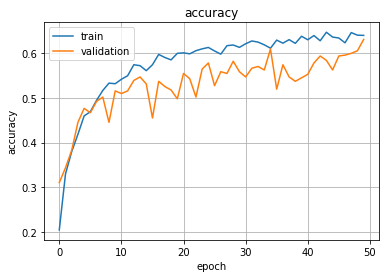

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()


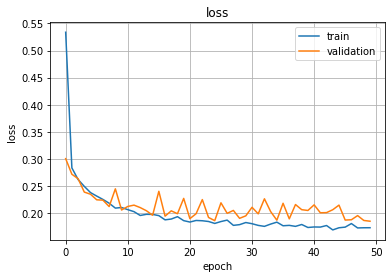

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()

In [20]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [25]:
upload_files()

Saving bird1.jpg to bird1 (1).jpg
Saving bird2.jpg to bird2 (1).jpg
Saving dog1.jpg to dog1.jpg
Saving dog2.jpg to dog2.jpg
Saving flog1.jpg to flog1.jpg
Saving frog2.jpg to frog2.jpg
Saving truck1.jpg to truck1.jpg


['bird1.jpg',
 'bird2.jpg',
 'dog1.jpg',
 'dog2.jpg',
 'flog1.jpg',
 'frog2.jpg',
 'truck1.jpg']

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


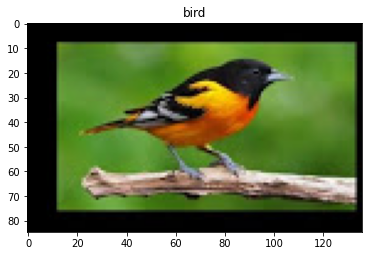

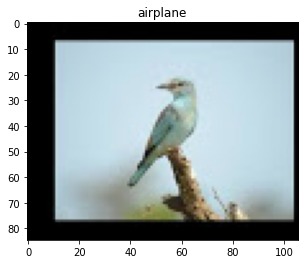

In [24]:
class_ = {0:'airplane', 1:'automobile', 2:'bird',3:'Cat', 4:'deer', 5:'dog', 6:'frog',7:'horse', 8:'ship', 9:'truck'}

from google.colab import files
from keras.preprocessing import image

items = os.listdir('/content')
for fn in items:
  if fn.endswith(".jpg"):
    path = '/content/' + fn
    img = image.load_img(path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    plt.figure()
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    plt.imshow(image.load_img(path))
    #plt.axis('Off')
    plt.title(format(class_[classes[0]]))